# Lec5 Logistic Classification

## 5-1 가설 함수의 정의

- 중요한 알고리즘
- 실제 적용할 수 있음

## 분류란
- 어떤 페북 feed를 보여줄 것인가.
- 스팸 메일 분류

## 0,1 안코딩
- 스펨이면 1 아니면 0 이런식
- 이걸 분류하는 것
### 예시
- 주식에서 팔까 살까
- 몇시간 공부해야 시험을 합격하는가 (0, 1 분류)

## 선형 회귀
- $H(x)=Wx+b$ 함수를 0과 1로 만든 함수 찾기
- $g(x) = \frac{1}{1+e^{-x}}$ 라는 시그모이드 함수(=로지스틱 함수)를 찾아냄
- 0~1 사이로 값을 만들 수 있어

## 가설 바꾸기
- $H(X) = \frac{1}{1+e^{-W^T X}}$로 변경
- 근데 이게 선형 함수가 아니기 때문에 구불구불하게 함수가 나와
- 밥그릇같은(?) 모습이 아니라 극소값이 많이 나와 문제가 됨
- 다음같은 cost 함수를 사용하자
## 새 cost 함수
- $c(H(x),y)= \begin{cases} -\log (H(x)) &: y=1 \\  -\log (1-H(x))&  : y=0 \end{cases}$
- 이해 팁: y값에 따라 각각 그래프를 그린다.
- 간단하게 강제로 한 줄로 합칠 수 있다. 
- $-y\log (H(x)) - (1-y)\log (1-H(x))$이렇게
- $W := W - \alpha \frac{\partial}{\partial W} cost(W)$를 이용해 경사강하법을 사용

## [tf2-05-1-logistic_regression.py](https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-05-1-logistic_regression.py)

In [20]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]


In [3]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=1, input_dim=2))
# use sigmoid activation for 0~1 problem
model.add(keras.layers.Activation('sigmoid'))



In [4]:
''' 
better result with loss function == 'binary_crossentropy', try 'mse' for yourself
adding accuracy metric to get accuracy report during training
'''
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


c:\Users\User\OneDrive - SNU\2022\computer\learn_ML\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [6]:
history = model.fit(x_data, y_data, epochs=1000)

# Accuracy report
print("Accuracy: ", history.history['accuracy'][-1])

Epoch 1/1000
1/1 [==============================] - 0s 382ms/step - loss: 1.0310 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.9906 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.9528 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.9176 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.8850 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.8548 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.8269 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.8014 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7779 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7565 - accuracy: 0.5000
Epoch 11/1000
1/1

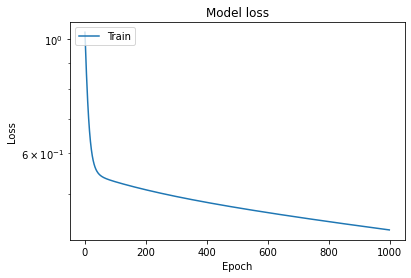

In [7]:
# Plot training & validation loss values
plt.plot(history.history['loss'][0:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.yscale('log')
plt.show()

## [tf2-05-2-logistic_regression_diabetes.py](https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-05-2-logistic_regression_diabetes.py)

In [4]:
import numpy as np

In [6]:
xy = np.loadtxt('data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [18]:
print(x_data.shape, y_data.shape)
# 모양을 출력한다.

(759, 8) (759, 1)


In [17]:
y_data.shape

(759, 1)

In [23]:
diamodel = keras.Sequential()
# multi-variable, x_data.shape[1] == feature counts == 8 in this case
diamodel.add(keras.layers.Dense(units=1, input_dim=x_data.shape[1], activation='sigmoid'))
diamodel.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.01),  metrics=['accuracy'])
diamodel.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


c:\Users\User\OneDrive - SNU\2022\computer\learn_ML\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [24]:

history = diamodel.fit(x_data, y_data, epochs=500)

Epoch 1/500
24/24 [==============================] - 0s 1ms/step - loss: 0.8525 - accuracy: 0.3636
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.8028 - accuracy: 0.3794
Epoch 3/500
24/24 [==============================] - 0s 1ms/step - loss: 0.7634 - accuracy: 0.3847
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7322 - accuracy: 0.4203
Epoch 5/500
24/24 [==============================] - 0s 1ms/step - loss: 0.7076 - accuracy: 0.4625
Epoch 6/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5349
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5995
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6430
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6403
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6601
Epoch 11/

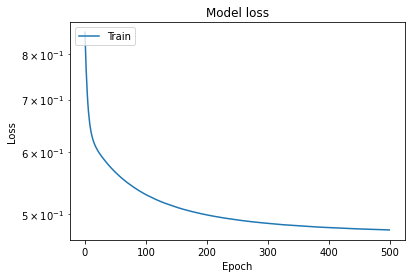

In [25]:
plt.plot(history.history['loss'][0:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.yscale('log')
plt.show()

In [ ]:

# predict a single data point
y_predict = diamodel.predict([[0.176471, 0.155779, 0, 0, 0, 0.052161, -0.952178, -0.733333]])
print("Predict: {0}".format(y_predict))

# evaluating model
evaluate = diamodel.evaluate(x_data, y_data)
print("loss: {0}, accuracy: {1}".format(evaluate[0], evaluate[1]))